In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings("ignore", category=DeprecationWarning)


%matplotlib inline

In [2]:
test  = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')
train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

In [3]:
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
totalData = train.append(test, ignore_index=True)

C:\Users\ketan\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [5]:
totalData.head(15)


,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,LP001002,Y,No,Urban,No
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,N,Yes,Rural,No
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,Y,Yes,Urban,Yes
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,Y,Yes,Urban,No
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,LP001008,Y,No,Urban,No
5,5417,4196.0,1.0,2,Graduate,Male,267.0,360.0,LP001011,Y,Yes,Urban,Yes
6,2333,1516.0,1.0,0,Not Graduate,Male,95.0,360.0,LP001013,Y,Yes,Urban,No
7,3036,2504.0,0.0,3+,Graduate,Male,158.0,360.0,LP001014,N,Yes,Semiurban,No
8,4006,1526.0,1.0,2,Graduate,Male,168.0,360.0,LP001018,Y,Yes,Urban,No
9,12841,10968.0,1.0,1,Graduate,Male,349.0,360.0,LP001020,N,Yes,Semiurban,No


In [6]:
pd.options.mode.chained_assignment = None
# totalData.Gender.unique() # array(['Male', 'Female', nan], dtype=object)
# totalData.Gender[totalData.Gender =='Male' ] = 1
# totalData.Gender[totalData.Gender =='Female' ] = 2
totalData['Gender'].fillna(1, inplace=True)
# totalData.Gender.unique() #array([1, 2], dtype=int64)

In [7]:
# totalData.Married.unique() # array(['No', 'Yes', nan], dtype=object)
# totalData.Married[totalData.Married =='No' ] = 1
# totalData.Married[totalData.Married =='Yes' ] = 2
totalData['Married'].fillna(1, inplace=True)
# totalData.Married.unique() #array([1, 2], dtype=int64)

In [8]:

# totalData.Education.unique() # array(['Graduate', 'Not Graduate'], dtype=object)
# totalData.Education[totalData.Education =='Graduate' ] = 2
# totalData.Education[totalData.Education =='Not Graduate' ] = 1
# totalData.Education.unique() # array([2, 1], dtype=object)

In [9]:
# totalData.Dependents.unique() ---->  array(['0', '1', '2', '3+', nan], dtype=object)
totalData.Dependents[totalData.Dependents =='3+' ] = 5
totalData['Dependents'].fillna(totalData['Dependents'].apply(float).median(), inplace=True)
# totalData['Dependents'].apply(float).median() # 0.0
totalData.Dependents[totalData.Dependents =='0'] = 0
totalData.Dependents[totalData.Dependents ==0.0] = 0
totalData.Dependents[totalData.Dependents =='1' ] = 1
totalData.Dependents[totalData.Dependents =='2' ] = 2

# totalData['Dependents'].unique() # array([0, 1, 2, 5], dtype=object)

In [10]:
# totalData.Credit_History.unique() # array([  1.,   0.,  nan])
totalData['Credit_History'].fillna(totalData['Credit_History'].apply(float).median(), inplace=True)
# totalData.Credit_History.unique() #array([ 1.,  0.])

In [11]:
# totalData.Self_Employed.unique() # array(['No', 'Yes', nan], dtype=object)
# totalData.Self_Employed[totalData.Self_Employed =='No'] = 1
# totalData.Self_Employed[totalData.Self_Employed =='Yes'] = 2
totalData['Self_Employed'].fillna(1, inplace=True)
# totalData.Self_Employed.unique() # array([1, 2], dtype=int64)

In [12]:
# totalData.Property_Area.unique() # array(['Urban', 'Rural', 'Semiurban'], dtype=object)
# totalData.Property_Area[totalData.Property_Area =='Urban' ] = 3
# totalData.Property_Area[totalData.Property_Area =='Rural' ] = 1
# totalData.Property_Area[totalData.Property_Area =='Semiurban' ] = 2
# totalData.Property_Area.unique() # array([3, 1, 2], dtype=object)
column_names_for_onehot = ['Property_Area','Self_Employed','Education','Married','Gender']
totalData = pd.get_dummies(totalData, columns=column_names_for_onehot, drop_first=True)
# xTrainEncoded

In [13]:
totalData.Loan_Status[totalData.Loan_Status =='Y' ] = 1
totalData.Loan_Status[totalData.Loan_Status =='N' ] = 0
totalData.Loan_Status.unique()
# totalData.Loan_Status[totalData.Loan_Status =='nan' ]
totalData.groupby(['Loan_Status']).size()

Loan_Status
0    192
1    422
dtype: int64

In [14]:
totalData = totalData.drop(["Loan_ID"], axis=1)
trainingData = totalData.iloc[:(train.shape[0])]
testingData = totalData.iloc[(train.shape[0]):]

trainingData = trainingData.dropna(axis=0)
y_train = trainingData['Loan_Status']
x_train = trainingData.iloc[:(train.shape[0])].drop(["Loan_Status"], axis=1)
y_train = y_train.astype('int')

x_test = testingData.drop(["Loan_Status"], axis=1)
x_test = x_test.fillna(0)

In [15]:
# Data Visulization function for PCA and SVD
def dataVisulizationFunction(components, method, y_total):
    principleDf = pd.concat([pd.DataFrame(data = components, columns=['Comp1', 'Comp2']), y_total], axis=1)

    #Graph ploting
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('Component 1', fontsize=15)
    ax.set_ylabel('Component 2', fontsize=15)
    ax.set_title("Data visulization using 2 components using - {}".format(method), fontsize=20)

    targets = [0, 1]
    colors = ['r', 'b']

    for target, color in zip(targets, colors):
        indicesToKeep = principleDf['Loan_Status'] == target
        ax.scatter(principleDf.loc[indicesToKeep, 'Comp1'], principleDf.loc[indicesToKeep, 'Comp2'], c = color, s = 50)

    ax.legend(targets)
    ax.grid()

Variance content of 2 components :[0.1922237  0.13342487]


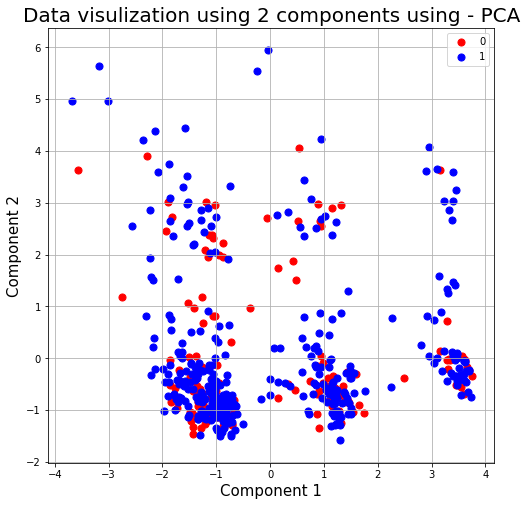

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
#PCA implementation
scalar = StandardScaler()
scalar.fit(x_train)
x = scalar.transform(x_train)
pca = PCA(n_components=2)
pcaComponents = pca.fit_transform(x)
dataVisulizationFunction(pcaComponents,"PCA", y_train)
print("Variance content of 2 components :{}".format(pca.explained_variance_ratio_))

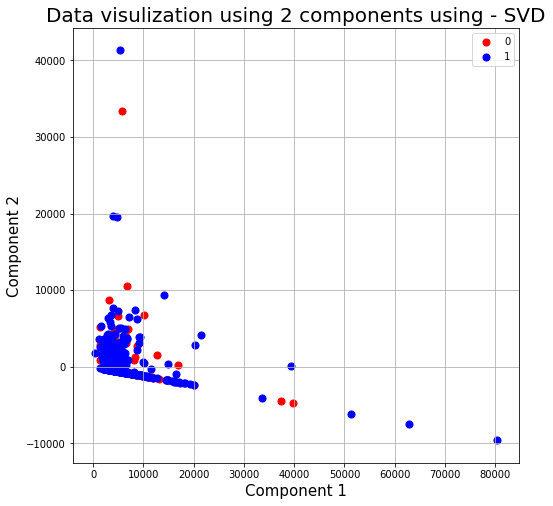

In [17]:
#SVD implementation
svd = TruncatedSVD(n_components=2)
u = svd.fit_transform(x_train)
s = svd.explained_variance_
vt = svd.components_
dataVisulizationFunction(u, "SVD",y_train)

In [18]:
# all parameters not specified are set to their defaults
from sklearn.ensemble import RandomForestClassifier
rft = RandomForestClassifier(n_estimators=1000, n_jobs = -1, random_state=42)

rft.fit(x_train, y_train)
print(testData.columns)
trainDataInput_1.columns

NameError: name 'testData' is not defined

In [ ]:
predictions = rft.predict(x_test)
# Use score method to get accuracy of model
# score = logisticRegr.score(trainDataInput_2, trainDataOutput_2.astype('int'))
# print(score)
# predictions
# test['Loan_ID']
# result = pd.DataFrame
# result['Loan_ID'] = pd.DataFrame(test["Loan_ID"])
# result['Loan_Status'] = pd.DataFrame(prediction)

print(len(predictions))
test["Loan_Status"] = pd.DataFrame(predictions, columns =["Loan_Status"])
print(test)
test.Loan_Status[test.Loan_Status == 1 ] = 'Y'
test.Loan_Status[test.Loan_Status == 0 ] = 'N'
print(test)
header = ["Loan_ID", "Loan_Status"]
test.to_csv('submission.csv', columns = header)
# numpy.savetxt('C:/Users/ketan/Desktop/Machine Learning/LogisticRegressionLoanProblem/test.csv',prediction, ,delimiter=',')
# testData

# Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
nnClassifier = MLPClassifier(solver='adam', learning_rate = 'adaptive',max_iter =500,
                     hidden_layer_sizes=(512,2), random_state=1)

nnClassifier.fit(x_train, y_train)


# Use score method to get accuracy of model
print(("Accuracy of training subset is: {:.3f}").format(nnClassifier.score(x_train, y_train)))

predicted_values = nnClassifier.predict(x_test)

In [ ]:
# from sklearn.svm import LinearSVC, SVC
# svclassifier = SVC(kernel= 'poly')
# svclassifier.fit(x_train, y_train)
# predicted_values_svc = svclassifier.predict(x_test)
# predicted_values_svc